In [1]:
#RIDGE REGRESSION AND LASSO REGRESSION

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
df=pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
df=pd.get_dummies(df,columns=["sex","smoker","day","time"],drop_first=True)   #convert categorical data into numerical data

In [15]:
df   #drop_first skip the duplicate data

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


In [17]:
x=df.drop(columns=["tip"])   #skip only tip column
y=df["tip"]

In [19]:
x

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,False,False,False,True,False,False
1,10.34,3,True,False,False,True,False,False
2,21.01,3,True,False,False,True,False,False
3,23.68,2,True,False,False,True,False,False
4,24.59,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
239,29.03,3,True,False,True,False,False,False
240,27.18,2,False,True,True,False,False,False
241,22.67,2,True,True,True,False,False,False
242,17.82,2,True,False,True,False,False,False


In [21]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [29]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [35]:
#Multiple Regression
ML=LinearRegression()
ML.fit(x_train,y_train)
y_pred_ML=ML.predict(x_test)
ML_mse=mean_squared_error(y_test,y_pred_ML)
ML_mse

0.7033566017436097

In [43]:
#Ridge Regression
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
ridge_mse=mean_squared_error(y_test,y_pred_ridge)
ridge_mse

0.7020504370518629

In [47]:
#Lasso Regression
lasso=Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)
lasso_mse=mean_squared_error(y_test,y_pred_lasso)
lasso_mse    #lasso regression remove the unneccesary function from the dataset

1.4486680232392768

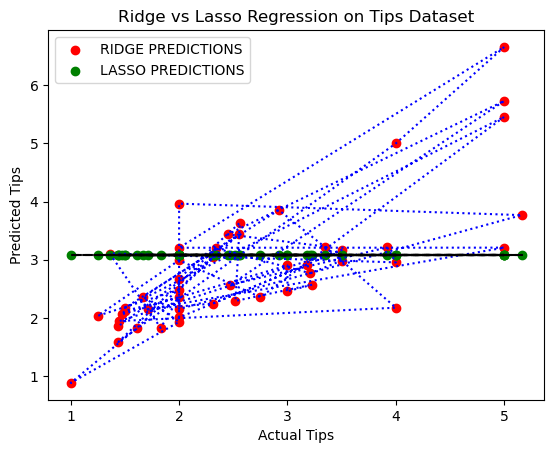

In [49]:
plt.scatter(y_test,y_pred_ridge,color='red',label="RIDGE PREDICTIONS")
plt.plot(y_test,y_pred_ridge,color='blue',linestyle="dotted")
plt.scatter(y_test,y_pred_lasso,color='green',label="LASSO PREDICTIONS")
plt.plot(y_test,y_pred_lasso,color='black',linestyle="dashed")
plt.legend()
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Ridge vs Lasso Regression on Tips Dataset")
plt.show()

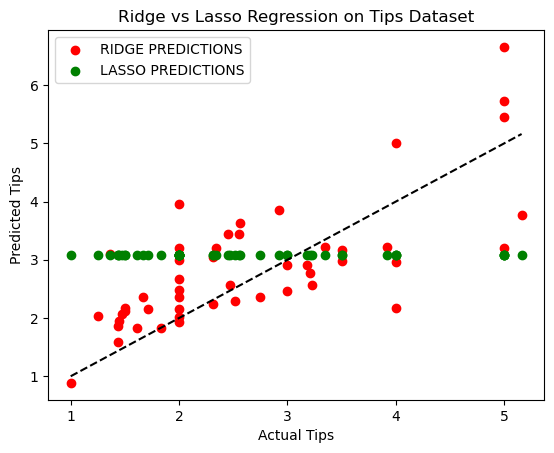

In [53]:
plt.scatter(y_test,y_pred_ridge,color='red',label="RIDGE PREDICTIONS")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="black",linestyle="dashed")
plt.scatter(y_test,y_pred_lasso,color='green',label="LASSO PREDICTIONS")
plt.legend()
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Ridge vs Lasso Regression on Tips Dataset")
plt.show()